In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [7]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,
                                                            housing.target,
                                                            random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,
                                                      y_train_all,
                                                      random_state=11)

In [9]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.summary()
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD()
             )
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train_scaled,
                    y_train,
                    validation_data=(x_valid_scaled, y_valid),
                    epochs=100,
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 710us/step - loss: 4.2607 - val_loss: 0.5260
Epoch 2/100
363/363 [==============================] - 0s 385us/step - loss: 0.4423 - val_loss: 0.4324
Epoch 3/100
363/363 [==============================] - 0s 372us/step - loss: 0.3932 - val_loss: 0.4573
Epoch 4/100
363/363 [==============================] - 0s 376us/step - loss: 0.3918 - val_loss: 0.3993
Epoch 5/100
363/363 [==============================] - 0s 429us/step - loss: 0.3816 - val_loss: 0.3970
Epoch 6/100
363/363 [==============================] - 0s 388us/step - loss: 0.3848 - val_loss: 0.4859
Epoch 7/100
363/363 [==============================] - 0s 375us/step - loss: 0.3937 - val_loss: 0.3870
Epoch 8/100
363/363 [==============================] - 0s 372us/step - loss: 0.3811 - val_loss: 0.3845
Epoch 9/100
363/363 [==============================] - 0s 371us/step - loss: 0.4065 - val_loss: 0.3841
Epoch 10/100
363/363 [==============================] - 0s 400us/step - l

In [38]:
def plot_learning_curves(history):
    df = pd.DataFrame(history.history)
    df.plot(figsize=(8,5))
    plt.grid(True)
    plt.ylim(0,1)
    plt.show()
    

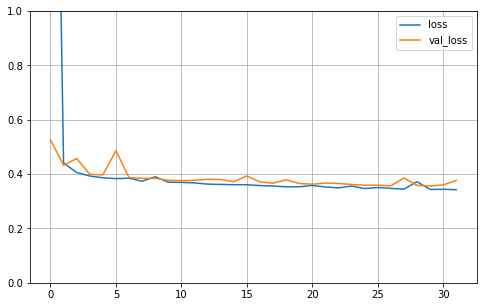

In [39]:
plot_learning_curves(history)

In [40]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 292us/step - loss: 0.3721


0.37214019894599915